# Homework 1

Load and validate GSS data

Allen Downey

[MIT License](https://en.wikipedia.org/wiki/MIT_License)

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

import utils
from utils import decorate
from thinkstats2 import Pmf, Cdf

## Loading and validation


In [2]:
def read_gss(dirname):
    """Reads GSS files from the given directory.
    
    dirname: string
    
    returns: DataFrame
    """
    dct = utils.read_stata_dict(dirname + '/GSS.dct')
    gss = dct.read_fixed_width(dirname + '/GSS.dat.gz',
                             compression='gzip')
    return gss

Read the variables I selected from the GSS dataset.  You can look up these variables at https://gssdataexplorer.norc.org/variables/vfilter

In [3]:
gss = read_gss('gss_eda')
print(gss.shape)
gss.head()

(62466, 101)


,year,id_,agewed,divorce,sibs,childs,age,educ,paeduc,maeduc,...,memchurh,realinc,cohort,marcohrt,ballot,wtssall,adults,compuse,databank,wtssnr
0,1972,1,0,0,3,0,23,16,10,97,...,0,18951.0,1949,0,0,0.4446,1,0,0,1.0
1,1972,2,21,2,4,5,70,10,8,8,...,0,24366.0,1902,1923,0,0.8893,2,0,0,1.0
2,1972,3,20,2,5,4,48,12,8,8,...,0,24366.0,1924,1944,0,0.8893,2,0,0,1.0
3,1972,4,24,2,5,0,27,17,16,12,...,0,30458.0,1945,1969,0,0.8893,2,0,0,1.0
4,1972,5,22,2,2,2,61,12,8,8,...,0,50763.0,1911,1933,0,0.8893,2,0,0,1.0


Most variables use special codes to indicate missing data.  We have to be careful not to use these codes as numerical data; one way to manage that is to replace them with `NaN`, which Pandas recognizes as a missing value.

In [4]:
def replace_invalid(df):
    df.realinc.replace([0], np.nan, inplace=True)                  
    df.educ.replace([98,99], np.nan, inplace=True)
    # 89 means 89 or older
    df.age.replace([98, 99], np.nan, inplace=True) 
    df.cohort.replace([9999], np.nan, inplace=True)
    df.adults.replace([9], np.nan, inplace=True)

replace_invalid(gss)

Here are summary statistics for the variables I have validated and cleaned.

In [5]:
gss['year'].describe()

count    62466.000000
mean      1994.072359
std         12.937941
min       1972.000000
25%       1984.000000
50%       1994.000000
75%       2006.000000
max       2016.000000
Name: year, dtype: float64

In [6]:
gss['sex'].describe()

count    62466.000000
mean         1.558768
std          0.496538
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: sex, dtype: float64

In [7]:
gss['age'].describe()

count    62245.000000
mean        45.991341
std         17.505563
min         18.000000
25%         31.000000
50%         44.000000
75%         59.000000
max         89.000000
Name: age, dtype: float64

In [8]:
gss['cohort'].describe()

count    62245.000000
mean      1948.087075
std         20.998696
min       1883.000000
25%       1934.000000
50%       1950.000000
75%       1963.000000
max       1998.000000
Name: cohort, dtype: float64

In [9]:
gss['race'].describe()

count    62466.000000
mean         1.247335
std          0.540917
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: race, dtype: float64

In [10]:
gss['educ'].describe()

count    62292.000000
mean        12.837234
std          3.179130
min          0.000000
25%         12.000000
50%         12.000000
75%         15.000000
max         20.000000
Name: educ, dtype: float64

In [11]:
gss['realinc'].describe()

count     56141.000000
mean      31636.199666
std       29402.370825
min         234.000000
25%       12080.625000
50%       24097.500000
75%       39022.500000
max      162607.000000
Name: realinc, dtype: float64

In [12]:
gss['wtssall'].describe()

count    62466.000000
mean         1.000016
std          0.461927
min          0.391825
25%          0.550100
50%          0.988100
75%          1.098500
max          8.739876
Name: wtssall, dtype: float64

**Exercise** 

1. Look through the column headings to find a few variables that look interesting.  Look them up on the GSS data explorer.  

2. Use `value_counts` to see what values appear in the dataset, and compare the results with the counts in the code book.  

3. Identify special values that indicate missing data and replace them with `NaN`.

4. Use `describe` to compute summary statistics.  What do you notice?

In [13]:
gss['agewed'].value_counts().sort_index()

0     35717
12        4
13       38
14      106
15      272
16      843
17     1453
18     2767
19     2886
20     2719
21     3324
22     2291
23     1980
24     1633
25     1477
26      978
27      867
28      603
29      452
30      454
31      230
32      238
33      160
34      119
35      135
36       72
37       58
38       62
39       56
40       62
41       18
42       35
43       22
44       12
45       23
46        9
47        7
48        7
49        8
50        8
51        3
52        9
53        3
54        6
55        8
56        4
57        2
58        5
59        1
60        4
61        1
62        1
63        2
65        1
68        1
70        1
73        2
90        1
98       19
99      187
Name: agewed, dtype: int64

In [14]:
gss['agewed'].replace([0, 98, 99], np.nan, inplace=True)

In [15]:
gss['agewed'].value_counts().sort_index()

12.0       4
13.0      38
14.0     106
15.0     272
16.0     843
17.0    1453
18.0    2767
19.0    2886
20.0    2719
21.0    3324
22.0    2291
23.0    1980
24.0    1633
25.0    1477
26.0     978
27.0     867
28.0     603
29.0     452
30.0     454
31.0     230
32.0     238
33.0     160
34.0     119
35.0     135
36.0      72
37.0      58
38.0      62
39.0      56
40.0      62
41.0      18
42.0      35
43.0      22
44.0      12
45.0      23
46.0       9
47.0       7
48.0       7
49.0       8
50.0       8
51.0       3
52.0       9
53.0       3
54.0       6
55.0       8
56.0       4
57.0       2
58.0       5
59.0       1
60.0       4
61.0       1
62.0       1
63.0       2
65.0       1
68.0       1
70.0       1
73.0       2
90.0       1
Name: agewed, dtype: int64

In [16]:
gss['agewed'].mean()

22.15005839581057

## Visualize distributions

Let's visualize the distributions of the variables we've selected.

Here's a Hist of the values in `educ`:

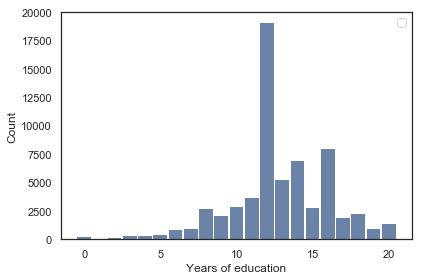

In [17]:
from thinkstats2 import Hist, Pmf, Cdf
import thinkplot

hist_educ = Hist(gss.educ)
thinkplot.hist(hist_educ)
utils.decorate(xlabel='Years of education', 
         ylabel='Count')

`Hist` as defined in `thinkstats2` is different from `hist` as defined in Matplotlib.  The difference is that `Hist` keeps all unique values and does not put them in bins.  Also, `hist` does not handle `NaN`.

One of the hazards of using `hist` is that the shape of the result depends on the bin size.

**Exercise:** 

1. Run the following cell and compare the result to the `Hist` above.

2. Add the keyword argument `bins=11` to `plt.hist` and see how it changes the results.

3. Experiment with other numbers of bins.

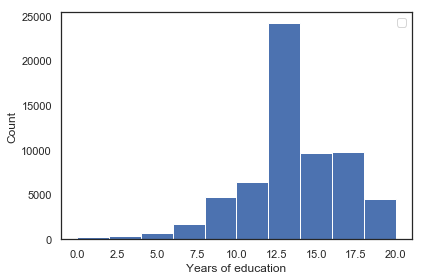

In [18]:
import matplotlib.pyplot as plt

plt.hist(gss.educ.dropna())
decorate(xlabel='Years of education', 
         ylabel='Count')

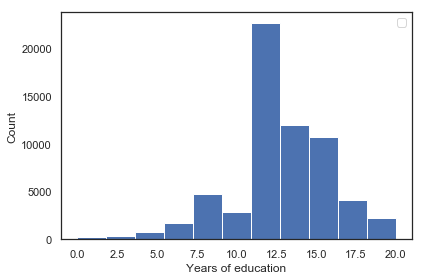

In [19]:
plt.hist(gss.educ.dropna(), bins=11)
decorate(xlabel='Years of education', 
         ylabel='Count')

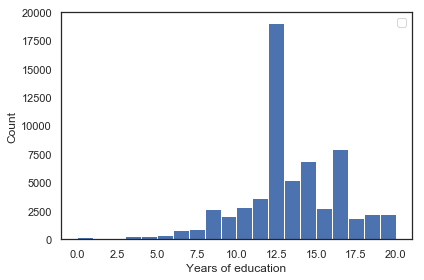

In [20]:
plt.hist(gss.educ.dropna(), bins=20)
decorate(xlabel='Years of education', 
         ylabel='Count')

However, a drawback of `Hist` and `Pmf` is that they basically don't work when the number of unique values is large, as in this example:

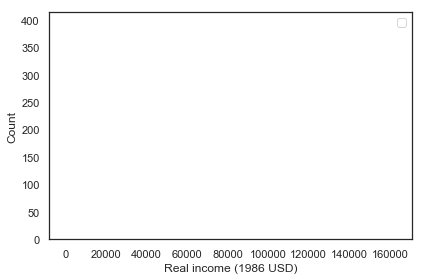

In [21]:
hist_realinc = Hist(gss.realinc)
thinkplot.hist(hist_realinc)
decorate(xlabel='Real income (1986 USD)', 
         ylabel='Count')

**Exercise:**
    
1. Make and plot a `Hist` of `age`.

2. Make and plot a `Pmf` of `educ`.

3. What fraction of people have 12, 14, and 16 years of education?

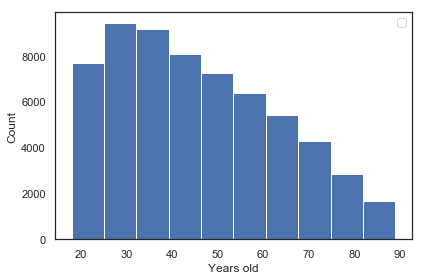

In [22]:
# Solution goes here
age_hist = gss.age.dropna()
plt.hist(age_hist)
decorate(xlabel='Years old', 
         ylabel='Count')

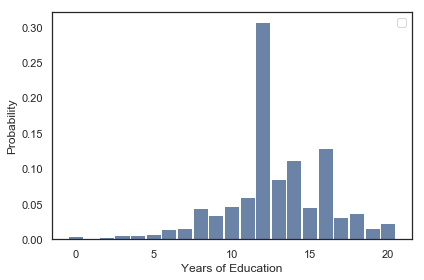

In [23]:
# Solution goes here
pmf_educ = Pmf(gss.educ.dropna())
thinkplot.Hist(pmf_educ)
decorate(xlabel='Years of Education', 
         ylabel='Probability')

In [24]:
# Solution goes here
total_educ = gss.educ.dropna().value_counts().sort_index().sum()
print("TOTAL:", total_educ)
gss.educ.dropna().value_counts().sort_index()

TOTAL: 62292


0.0       161
1.0        45
2.0       148
3.0       247
4.0       314
5.0       399
6.0       808
7.0       871
8.0      2689
9.0      2032
10.0     2815
11.0     3648
12.0    19006
13.0     5177
14.0     6847
15.0     2783
16.0     7925
17.0     1870
18.0     2265
19.0      875
20.0     1367
Name: educ, dtype: int64

In [25]:
# Solution goes here
query = gss[(gss.educ == 12) | (gss.educ == 14) | (gss.educ == 16)]
total_educ_filtered = query.educ.dropna().value_counts().sum()
total_educ_filtered

33778

In [26]:
total_educ_filtered/total_educ

0.5422526167084055

**Exercise:**
    
1. Make and plot a `Cdf` of `educ`.

2. What fraction of people have more than 12 years of education?

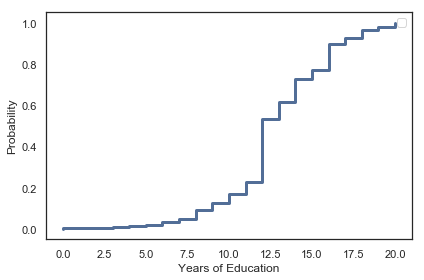

In [27]:
# Solution goes here
cdf_educ = Cdf(gss.educ.dropna())
thinkplot.Cdf(cdf_educ)
decorate(xlabel='Years of Education', 
         ylabel='Probability')

In [28]:
# Solution goes here
total_educ = gss.educ.dropna().value_counts().sort_index().sum()
query = gss[gss.educ > 12]
total_educ_filtered = query.educ.dropna().value_counts().sum()
print(total_educ)
print(total_educ_filtered)

62292
29109


In [29]:
# Solution goes here
total_educ_filtered/total_educ

0.46729917164322865

**Exercise:**
    
1. Make and plot a `Cdf` of `age`.

2. What is the median age?  What is the inter-quartile range (IQR)?

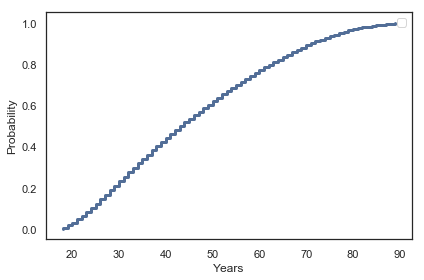

In [30]:
# Solution goes here
cdf_age = Cdf(gss.age.dropna())
thinkplot.Cdf(cdf_age)
decorate(xlabel='Years', 
         ylabel='Probability')

In [31]:
# Solution goes here
gss.age.dropna().median()

44.0

In [32]:
# Solution goes here
gss.age.dropna().describe()

count    62245.000000
mean        45.991341
std         17.505563
min         18.000000
25%         31.000000
50%         44.000000
75%         59.000000
max         89.000000
Name: age, dtype: float64

#### Median and IQR
Median: 44, IQR: 59-31 = 28

**Exercise:**

Find another numerical variable, plot a histogram, PMF, and CDF, and compute any statistics of interest.

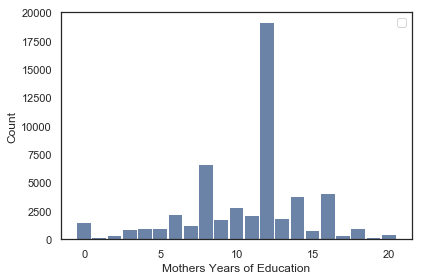

In [33]:
# Solution goes here
gss.maeduc.replace([97, 98, 99], np.nan, inplace=True)
hist_maeduc = Hist(gss.maeduc)
thinkplot.hist(hist_maeduc)
utils.decorate(xlabel='Mothers Years of Education', 
         ylabel='Count')

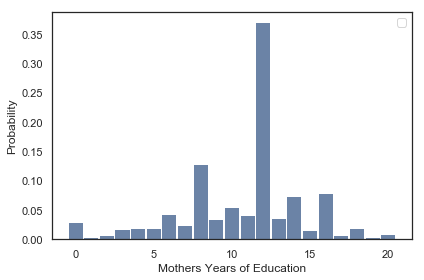

In [34]:
# Solution goes here
pmf_maeduc = Pmf(gss.maeduc.dropna())
thinkplot.Hist(pmf_maeduc)
decorate(xlabel='Mothers Years of Education', 
         ylabel='Probability')

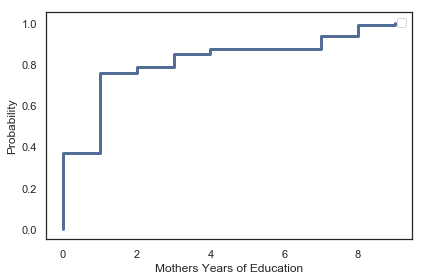

In [35]:
# Solution goes here
cdf_madeg = Cdf(gss.madeg.dropna())
thinkplot.Cdf(cdf_madeg)
decorate(xlabel='Mothers Years of Education', 
         ylabel='Probability')

In [36]:
# Solution goes here
gss.maeduc.describe()

count    51781.000000
mean        10.812306
std          3.760914
min          0.000000
25%          8.000000
50%         12.000000
75%         12.000000
max         20.000000
Name: maeduc, dtype: float64

**Exercise:**

1. Compute the CDF of `realinc` for male and female respondents, and plot both CDFs on the same axes.

2. What is the difference in median income between the two groups?

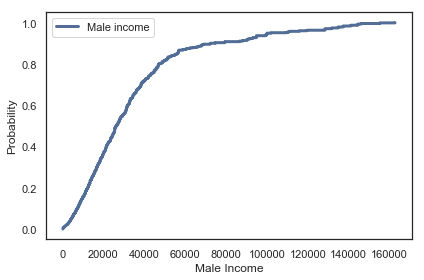

In [37]:
# Solution goes here
gss_male = gss[gss.sex == 1]
cdf_realinc_male = Cdf(gss_male.realinc.dropna(), label="Male income")
thinkplot.Cdf(cdf_realinc_male)
decorate(xlabel='Male Income', 
         ylabel='Probability')

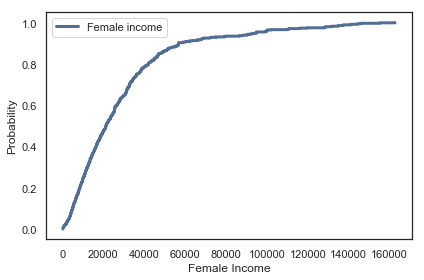

In [38]:
# Solution goes here
gss_female = gss[gss.sex == 2]
cdf_realinc_female = Cdf(gss_female.realinc.dropna(), label="Female income")
thinkplot.Cdf(cdf_realinc_female)
decorate(xlabel='Female Income', 
         ylabel='Probability')

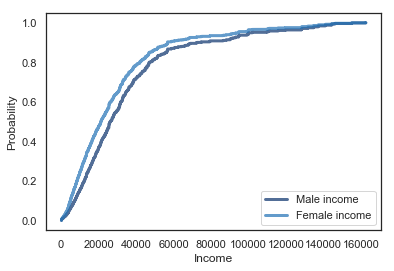

In [39]:
# Solution goes here
thinkplot.Cdfs([cdf_realinc_male, cdf_realinc_female])
thinkplot.Config(xlabel='Income', ylabel="Probability")

In [40]:
# Solution goes here
print(gss_female.realinc.median())
print(gss_male.realinc.median())
diff = gss_male.realinc.median() - gss_female.realinc.median()
print(diff)

21299.0
26484.0
5185.0


**Exercise:**

Use a variable to break the dataset into groups and plot multiple CDFs to compare distribution of something within groups.

Note: Try to find something interesting, but be cautious about overinterpreting the results.  Between any two groups, there are often many differences, with many possible causes.

In [41]:
# Solution goes here
young_adults = gss[gss.age <= 34]
old_adults = gss[gss.age > 35]

In [42]:
# Solution goes here
cdf_young = Cdf(young_adults.realinc.dropna(), label="Young Adults income")
cdf_old = Cdf(old_adults.realinc.dropna(), label="Old Adults income")
cdf_all = Cdf(gss.realinc.dropna(), label="Overall income")

cdf_educ_young = Cdf(young_adults.educ.dropna(), label="Young Adults Education")
cdf_educ_old = Cdf(old_adults.educ.dropna(), label="Old Adults Education")
cdf_educ_all = Cdf(gss.educ.dropna(), label="Overall Education")

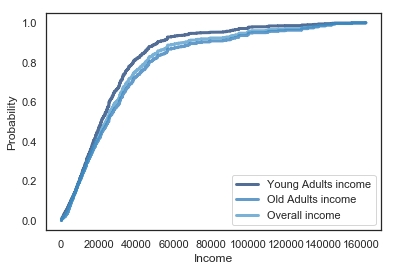

In [43]:
# Solution goes here
thinkplot.Cdfs([cdf_young, cdf_old, cdf_all])
thinkplot.Config(xlabel='Income', ylabel="Probability")

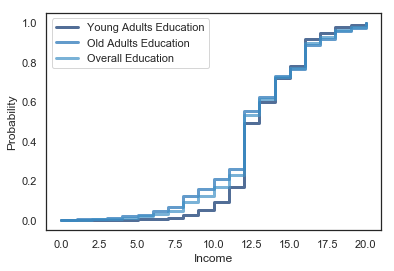

In [44]:
# Solution goes here
thinkplot.Cdfs([cdf_educ_young, cdf_educ_old, cdf_educ_all])
thinkplot.Config(xlabel='Income', ylabel="Probability")

## Save the cleaned data

Now that we have the data in good shape, we'll save it in a binary format (HDF5), which will make it faster to load later.

Also, we have to do some resampling to make the results representative.  We'll talk about this in class.

In [45]:
np.random.seed(19)
sample = utils.resample_by_year(gss, 'wtssall')

Save the file.

In [46]:
#!rm gss.hdf5
sample.to_hdf('gss.hdf5', 'gss')

Load it and see how fast it is!

In [47]:
%time gss = pd.read_hdf('gss.hdf5', 'gss')
gss.shape

Wall time: 42.9 ms


(62466, 101)